In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
import warnings
warnings.filterwarnings('ignore')



In [2]:
image_size=(256,256)
Batch_size=32
ds=tf.keras.utils.image_dataset_from_directory(
    "cell_images",
    shuffle=True,
    image_size=image_size,
    batch_size=Batch_size
    
)

Found 27558 files belonging to 2 classes.


In [3]:
len(ds)

862

In [4]:
class_names=ds.class_names

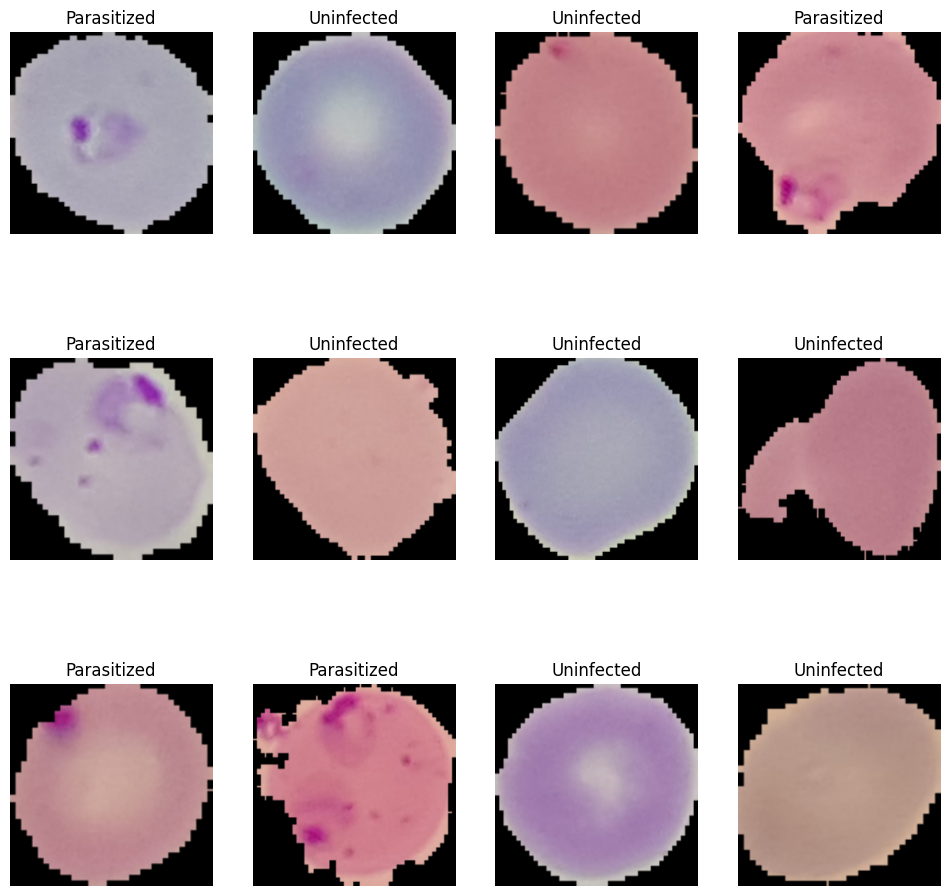

In [5]:
plt.figure(figsize=(12,12))
for images, labels in ds.take(1) :
    for i in range(12) :
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis(False)

In [6]:
#train size 80 percent
# 10 percent for validation
# 10 percent for test

In [7]:
def train_test_split(ds,train_size=0.8,val_size=0.1,test_size=0.1) :
    train_len=int(train_size*len(ds))
    train_ds=ds.take(train_len)
    valid_len=int(val_size*len(ds))
    valid_ds=ds.skip(train_len).take(valid_len)
    test_ds=ds.skip(train_len).skip(valid_len)
    
    return train_ds,valid_ds,test_ds

In [8]:
train_ds,valid_ds,test_ds=train_test_split(ds)

In [9]:
len(train_ds)

689

In [10]:
len(valid_ds)

86

In [11]:
len(test_ds)

87

In [12]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Data agumentation and scaling

In [13]:
from tensorflow import keras
resize_rescale=keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_agumentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
model=models.Sequential([
    resize_rescale,
    data_agumentation,
    layers.Conv2D(32,3,activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
    
])
model.build(input_shape=(32,256,256,3))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [17]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [19]:
history=model.fit(
    train_ds,
    epochs=5,
    batch_size=32,
    verbose=1,
    validation_data=valid_ds
)

Epoch 1/5
689/689 [==============================] - 2244s 3s/step - loss: 0.3869 - accuracy: 0.8256 - val_loss: 0.2236 - val_accuracy: 0.9230
Epoch 2/5
689/689 [==============================] - 5805s 8s/step - loss: 0.2146 - accuracy: 0.9300 - val_loss: 0.1963 - val_accuracy: 0.9382
Epoch 3/5
689/689 [==============================] - 6685s 10s/step - loss: 0.1971 - accuracy: 0.9349 - val_loss: 0.1868 - val_accuracy: 0.9437
Epoch 4/5
689/689 [==============================] - 2004s 3s/step - loss: 0.2035 - accuracy: 0.9350 - val_loss: 0.1787 - val_accuracy: 0.9495
Epoch 5/5
689/689 [==============================] - 1441s 2s/step - loss: 0.1779 - accuracy: 0.9447 - val_loss: 0.1803 - val_accuracy: 0.9469


In [20]:
from keras.models import load_model
model.save("breast_cancer.h5")
# loaded_model = load_model("network.h5")
# loss, accuracy = loaded_model.evaluate(test_data, test_targets)
